In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape original:", x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape original: (60000, 28, 28)


In [ ]:
def preprocess(x, y):
    x = tf.expand_dims(x, -1)  # (28,28,1)
    x = tf.image.grayscale_to_rgb(x)  # (28,28,3)
    x = tf.image.resize(x, [224, 224])  # (224,224,3)
    x = tf.cast(x, tf.float32) / 255.0  # normalizar
    return x, y

# Criar datasets com pipeline
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Criar modelo com Transfer Learning
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # congelar modelo base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 dígitos
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compilar e treinar
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.8800 - loss: 0.3849 - val_accuracy: 0.9623 - val_loss: 0.1154
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 38ms/step - accuracy: 0.9596 - loss: 0.1287 - val_accuracy: 0.9753 - val_loss: 0.0787
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9667 - loss: 0.1038 - val_accuracy: 0.9790 - val_loss: 0.0698
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9698 - loss: 0.0893 - val_accuracy: 0.9792 - val_loss: 0.0685
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9733 - loss: 0.0823 - val_accuracy: 0.9788 - val_loss: 0.0684


In [ ]:
# Avaliar
loss, acc = model.evaluate(test_ds)
print(f"Acurácia no teste: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9752 - loss: 0.0768
Acurácia no teste: 0.9788


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


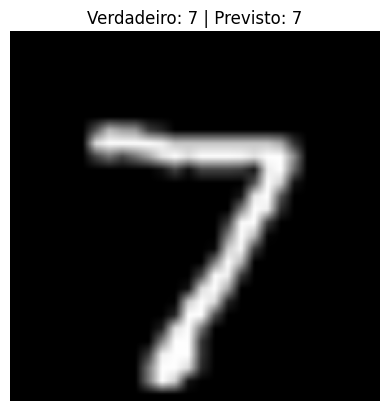

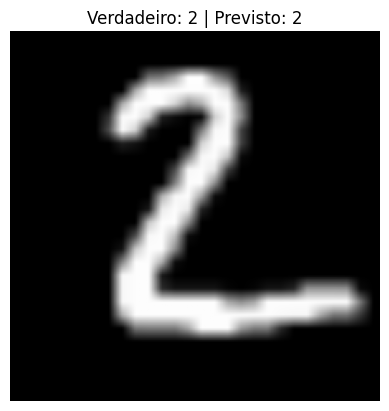

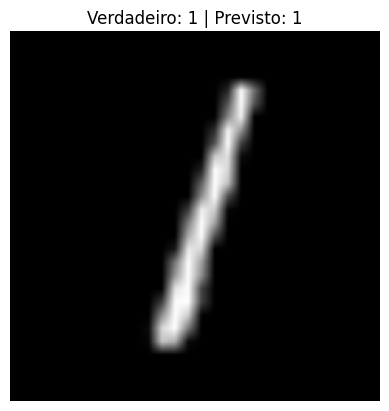

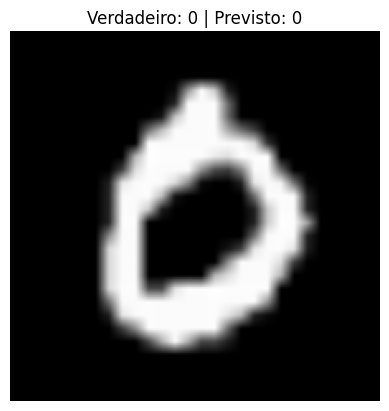

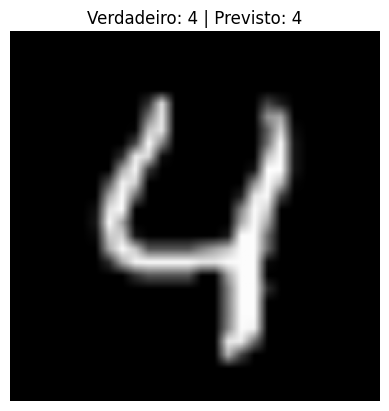

In [ ]:
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    for i in range(5):
        plt.imshow(images[i].numpy())
        plt.title(f"Verdadeiro: {labels[i].numpy()} | Previsto: {np.argmax(preds[i])}")
        plt.axis('off')
        plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Salvar o arquivo
with open("mnist_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp5rzud8qv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135906016714320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906012677136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906012676944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906016711440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906016712208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906016714896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906012677328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906012678096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906012678480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906012676752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906012